Se realizan las importaciones necesarias.

In [97]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
def sql_query(query):

    # Ejecuta la query
    cursor_clase.execute(query)
                                    

    # Almacena los datos de la query 
    ans = cursor_clase.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor_clase.description]

    return pd.DataFrame(ans,columns=names)

### Hipótesis: A partir de la temporada 2014-2015 (primer anillo de los GSW), la NBA se compone de:
1. Más triples, con un mayor porcentaje de acierto
2. Menos tiros de 2 y menos pts de media distancia, lo considerado ahora menos eficiente
3. Más contraataques
4. Menos juego interior y en la zona
5. Partidos con más puntos

- Rebusqué por kaggle y encontré esta base de datos que se adecuaba a lo que buscaba: https://www.kaggle.com/datasets/wyattowalsh/basketball?rvi=1

#### La base de datos que encontré tenía distintos csv:

- player: los jugadores que hay
- game_summary: resultado de los partidos de 1946 a 2022
- line_score: todos los partidos y los puntos por cuarto
- game: todos los partidos, quién jugo, porcentaje de tiros acertados, de 3, libres...
- other_stats: todos los partidos y los tipos de puntos (en pintura, 2a oportunidad, en contraataque), asistencias, rebotes y pérdidas totales...
- play_by_play: todos los eventos de cada partidos, hechos por x jugador en x minuto
------
- draft_combine_stats: todos los jugadores drafteados con sus características (de 2004 a 2023 sin 2006, 2016 y 2021)
- Common_player_info: todos los jugadores por orden alfabético y qué temporadas estuvieron
- draft_history: datos del draft históricos
- team: los equipos que existen

## Realizamos la query para obtener los datos necesarios:
* Todos los datos relacionados con puntos de todos los partidos entre 2006 y 2022

In [5]:
# Conectamos con la base de datos
connection = sqlite3.connect("./data/archive/nba.sqlite")
# Obtenemos un cursor que utilizaremos para hacer la query
cursor_clase = connection.cursor()

In [6]:
query = '''
SELECT a.matchup_home as Partido, b.team_abbreviation_home as Local, b.team_abbreviation_away as Visitante, c.season as "Temporada",
a.pts_home as "Puntos Local", a.pts_away as "Puntos Visitante",
b.pts_paint_home as "Puntos en zona Local", b.pts_2nd_chance_home as "Puntos 2a oportunidad Local", b.pts_fb_home as "Puntos en transición Local", 
a.fg3m_home as "Triples Local", a.fg3a_home as "Triples intentados Local", a.fg3_pct_home as "% triples Local",
a.ftm_home as "Tiros libres Local", a.fta_home as "Tiros libres intentados Local", a.ft_pct_home as "% tiros libres Local",
b.pts_paint_away as "Puntos en zona Visitante", b.pts_2nd_chance_away as "Puntos 2a oportunidad Visitante", b.pts_fb_away as "Puntos en transición Visitante", 
a.fg3m_away as "Triples Visitante", a.fg3a_away as "Triples intentados Visitante", a.fg3_pct_away as "% triples Visitante",
a.ftm_away as "Tiros libres Visitante", a.fta_away as "Tiros libres intentados Visitante", a.ft_pct_away as "% tiros libres Visitante"
FROM game as A
LEFT JOIN other_stats as B
ON a.game_id = b.game_id
LEFT JOIN game_summary as C
ON c.game_id = a.game_id
WHERE c.season BETWEEN 2006 AND 2022
'''
nba = sql_query(query)
nba

,Partido,Local,Visitante,Temporada,Puntos Local,Puntos Visitante,Puntos en zona Local,Puntos 2a oportunidad Local,Puntos en transición Local,Triples Local,...,% tiros libres Local,Puntos en zona Visitante,Puntos 2a oportunidad Visitante,Puntos en transición Visitante,Triples Visitante,Triples intentados Visitante,% triples Visitante,Tiros libres Visitante,Tiros libres intentados Visitante,% tiros libres Visitante
0,LAL vs. PHX,LAL,PHX,2006,114.0,106.0,66.0,9.0,25.0,6.0,...,0.667,34.0,8.0,20.0,13.0,30.0,0.433,13.0,17.0,0.765
1,MIA vs. CHI,MIA,CHI,2006,66.0,108.0,26.0,2.0,6.0,3.0,...,0.591,36.0,18.0,21.0,7.0,13.0,0.538,23.0,32.0,0.719
2,MEM vs. NYK,None,None,2006,117.0,118.0,NaN,NaN,NaN,6.0,...,0.600,NaN,NaN,NaN,10.0,22.0,0.455,28.0,36.0,0.778
3,NJN vs. TOR,TOR,NJN,2006,102.0,92.0,40.0,13.0,21.0,3.0,...,0.792,44.0,10.0,20.0,4.0,20.0,0.200,14.0,20.0,0.700
4,ORL vs. CHI,CHI,ORL,2006,109.0,94.0,38.0,11.0,9.0,6.0,...,0.786,44.0,10.0,17.0,6.0,20.0,0.300,14.0,24.0,0.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,...,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20045,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,...,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20046,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,...,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20047,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,...,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750


## Realizamos la limpieza necesaria:

* Eliminar los partidos del All-Star Weekend (para no falsear los datos en puntuación)

In [7]:
nba = nba[nba["Local"] != "EST"]
nba = nba[nba["Visitante"] != "EST"]
nba = nba[nba["Visitante"] != "LBN"]
nba = nba[nba["Local"] != "LBN"]
nba = nba[nba["Partido"] != "WST vs. EST"]

### Según la hipótesis, tenemos una muestra más grande o más pequeña (aunque parecida) para probarla:

*CRIBADO (19973 datos)*
- Más triples, con un mayor porcentaje de acierto
- Partidos con más puntos
---
*NO CRIBADO (18283 datos)*
- Menos tiros de 2 y menos pts de media distancia, lo considerado ahora menos eficiente 
- Más contraataques
- Menos juego interior y en la zona

## Ahora creo la columna de tiros de 2 (media distancia) para cada partido, restando a los puntos totales los conseguidos en la zona, desde la línea de tiro libre y desde la linea de 3

In [8]:
nba["Puntos de media distancia Local"] = nba["Puntos Local"] - nba["Puntos en zona Local"] - nba["Tiros libres Local"] - nba["Triples Local"]
nba["Puntos de media distancia Visitante"] = nba["Puntos Visitante"] - nba["Puntos en zona Visitante"] - nba["Tiros libres Visitante"] - nba["Triples Visitante"]

Existen 2 años de los que no se tiene la misma cantidad de datos que los demás:
* De 2012 hay poquísimos datos por el lockdown (huelga de jugadores) 
* De 2019 faltan por la pandemia

No es preocupante ya que se aleja algo del intervalo más acotado a analizar (2013-2017)

### Se sacan las cantidades totales de puntos por local y visitante:

In [9]:
nba["Puntos en zona Total"] = nba["Puntos en zona Local"] + nba["Puntos en zona Visitante"]

nba["Puntos de media distancia Total"] = nba["Puntos de media distancia Local"] + nba["Puntos de media distancia Visitante"]

nba["Puntos de 3 Total"] = nba["Triples Local"]*3 + nba["Triples Visitante"]*3
nba["Triples encestados Total"] = nba["Triples Local"] + nba["Triples Visitante"]
nba["Triples intentados Total"] = nba["Triples intentados Local"] + nba["Triples intentados Visitante"]

nba["Puntos tiros libres Total"] = nba["Tiros libres Local"] + nba["Tiros libres Visitante"]
nba["Puntos en transición Total"] = nba["Puntos en transición Local"] + nba["Puntos en transición Visitante"]
nba["Puntos Total"] = nba["Puntos Local"] + nba["Puntos Visitante"]

# Sería interesante hacer gráficas de evolución a lo largo de los años de los:
1. Tiros de 3 (puntos que vienen de triples, triples intentados, triples encestados)
2. Tiros de 2
3. Tiros en la zona
4. Puntos en transición
5. Puntuaciones

* Lo primero es agrupar los datos por temporada en un nuevo dataset:

In [10]:
partidos_por_temporada = nba['Temporada'].value_counts()
nba_agrupados = nba.groupby('Temporada').sum()

* Luego creamos las medias:

In [11]:
nba_agrupados['Media Puntos'] = nba_agrupados['Puntos Total']/partidos_por_temporada

nba_agrupados['Media Puntos Triples'] = nba_agrupados['Puntos de 3 Total']/partidos_por_temporada
nba_agrupados['Media Triples intentados'] = nba_agrupados['Triples intentados Total']/partidos_por_temporada
nba_agrupados['Media Triples encestados'] = nba_agrupados['Triples encestados Total']/partidos_por_temporada

nba_agrupados['Media Puntos de media distancia'] = nba_agrupados['Puntos de media distancia Total']/partidos_por_temporada

nba_agrupados['Media Puntos Tiros Libres'] = nba_agrupados['Puntos tiros libres Total']/partidos_por_temporada

nba_agrupados['Media Puntos en Zona'] = nba_agrupados['Puntos en zona Total']/partidos_por_temporada

nba_agrupados['Media Puntos en Transición'] = nba_agrupados['Puntos en transición Total']/partidos_por_temporada

* Me deshago de las columnas que no me interesan:

In [12]:
nba_agrupados = nba_agrupados.drop(["Partido","Local","Visitante"], axis = 1)

* Creo el dataset de las medias por temporada, que será el que analizaré:

In [13]:
nba_agrupados = nba_agrupados.reset_index()
nba_agrupados

,Temporada,Puntos Local,Puntos Visitante,Puntos en zona Local,Puntos 2a oportunidad Local,Puntos en transición Local,Triples Local,Triples intentados Local,% triples Local,Tiros libres Local,...,Puntos en transición Total,Puntos Total,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Puntos Tiros Libres,Media Puntos en Zona,Media Puntos en Transición
0,2006,126390.0,122668.0,43168.0,13972.0,13038.0,7747.0,21533.0,446.264,25619.0,...,26068.0,249058.0,196.883794,36.201581,33.937549,12.067194,56.659289,39.825296,67.584190,20.607115
1,2007,130692.0,125886.0,44370.0,14717.0,13873.0,8432.0,23106.0,465.210,25330.0,...,27767.0,256578.0,199.051978,38.839410,35.922420,12.946470,60.167572,38.322731,69.140419,21.541505
2,2008,128084.0,124040.0,43188.0,14156.0,13322.0,8379.0,22798.0,461.838,25077.0,...,26348.0,252124.0,198.835962,39.624606,36.213722,13.208202,57.742902,38.401420,68.012618,20.779180
3,2009,130947.0,127007.0,47270.0,14684.0,15862.0,8230.0,23194.0,452.308,25199.0,...,31464.0,257954.0,200.430458,38.384615,36.142191,12.794872,58.138306,38.185703,72.777001,24.447552
4,2010,132902.0,128251.0,50072.0,16028.0,17350.0,8654.0,23938.0,469.721,25712.0,...,34283.0,261153.0,197.993177,38.526914,36.011372,12.842305,61.514784,38.027293,76.086429,25.991660
5,2011,97209.0,94088.0,37284.0,11835.0,12170.0,6415.0,18256.0,345.300,17496.0,...,24391.0,191297.0,191.872618,38.313942,36.692076,12.771314,58.353059,34.084253,74.866600,24.464393
6,2012,17738.0,17046.0,6932.0,2234.0,2256.0,1281.0,3658.0,63.761,3465.0,...,4345.0,34784.0,190.076503,41.901639,40.486339,13.967213,58.655738,36.338798,74.644809,23.743169
7,2013,132697.0,129341.0,51264.0,16025.0,16415.0,10046.0,27956.0,464.999,24077.0,...,32661.0,262038.0,200.795402,46.344828,43.154023,15.448276,61.687356,35.950958,78.079693,25.027586
8,2014,131863.0,128706.0,51202.0,15952.0,16370.0,10368.0,29335.0,456.639,23169.0,...,32444.0,260569.0,199.822853,47.231595,45.015337,15.743865,61.527607,34.907209,78.360429,24.880368
9,2015,135208.0,131264.0,52042.0,15529.0,16388.0,11250.0,31574.0,463.060,23846.0,...,32595.0,266472.0,204.506523,51.287797,48.586339,17.095932,63.203377,35.817345,79.737529,25.015349


In [14]:
parte1 = nba_agrupados.iloc[:, 0].copy()
parte2 = nba_agrupados.iloc[:, 30:].copy()

nba_medias = pd.concat([parte1, parte2], axis=1)
nba_medias.set_index('Temporada')

,Puntos Total,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Puntos Tiros Libres,Media Puntos en Zona,Media Puntos en Transición
Temporada,,,,,,,,,
2006,249058.0,196.883794,36.201581,33.937549,12.067194,56.659289,39.825296,67.584190,20.607115
2007,256578.0,199.051978,38.839410,35.922420,12.946470,60.167572,38.322731,69.140419,21.541505
2008,252124.0,198.835962,39.624606,36.213722,13.208202,57.742902,38.401420,68.012618,20.779180
2009,257954.0,200.430458,38.384615,36.142191,12.794872,58.138306,38.185703,72.777001,24.447552
2010,261153.0,197.993177,38.526914,36.011372,12.842305,61.514784,38.027293,76.086429,25.991660
2011,191297.0,191.872618,38.313942,36.692076,12.771314,58.353059,34.084253,74.866600,24.464393
2012,34784.0,190.076503,41.901639,40.486339,13.967213,58.655738,36.338798,74.644809,23.743169
2013,262038.0,200.795402,46.344828,43.154023,15.448276,61.687356,35.950958,78.079693,25.027586
2014,260569.0,199.822853,47.231595,45.015337,15.743865,61.527607,34.907209,78.360429,24.880368


### Hacemos una primera inspección de los datos, explorando las gráficas a lo largo de las temporadas mediante gráficos de línea:

Primero, una muy importante es ver la evolución de los tipos de puntos:

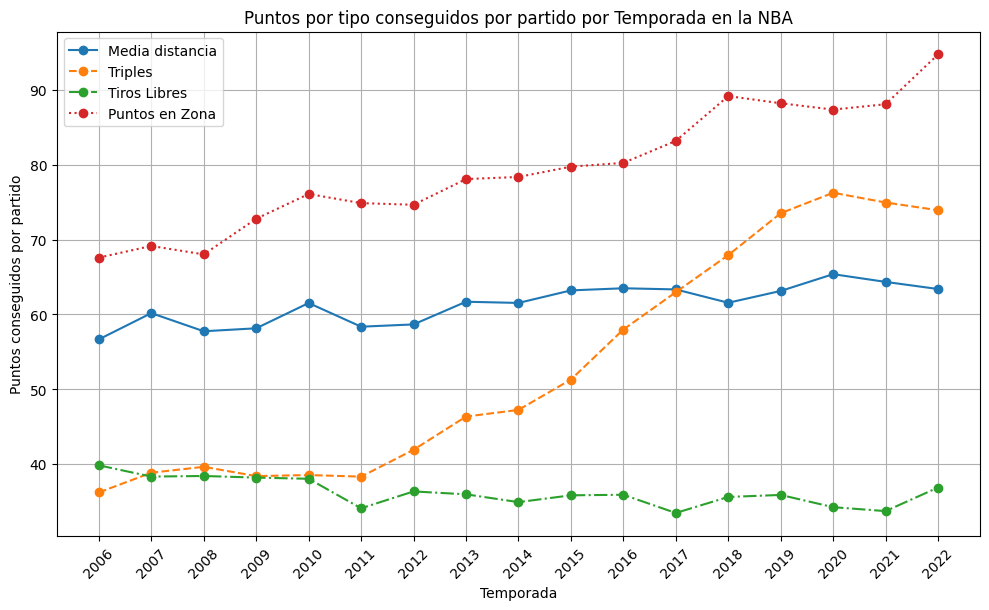

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos de media distancia'], marker='o', linestyle='-', label = 'Media distancia')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos Tiros Libres'], marker='o', linestyle='-.', label = 'Tiros Libres')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos en Zona'], marker='o', linestyle=':', label = 'Puntos en Zona')

plt.xlabel('Temporada')
plt.ylabel('Puntos conseguidos por partido')
plt.title('Puntos por tipo conseguidos por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

* Ha habido:
1. Casi una duplicación de puntos venidos de triples
2. Un 25% más de puntos desde la zona
3. No existe una gran diferencia de los puntos de media distancia y tiros libres

Segundo, explorar los intentos de triples:

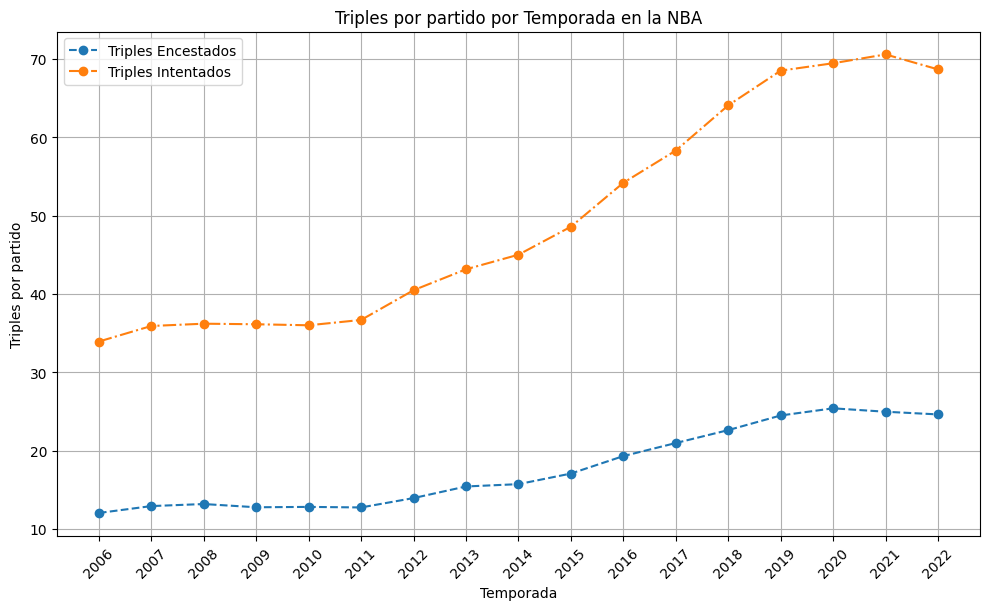

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Triples encestados'], marker='o', linestyle='--', label = 'Triples Encestados')
plt.plot(nba_medias.Temporada, nba_medias['Media Triples intentados'], marker='o', linestyle='-.', label = 'Triples Intentados')

plt.xlabel('Temporada')
plt.ylabel('Triples por partido')
plt.title('Triples por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45) 
plt.legend()
plt.show()

* Se intentan el doble de tiros de 3 (y por lo tanto se encestan el doble)

Tercero, a ver si se realizan más contraataques y puntos en transición, ya que la teoría es que el juego se ha acelerado.

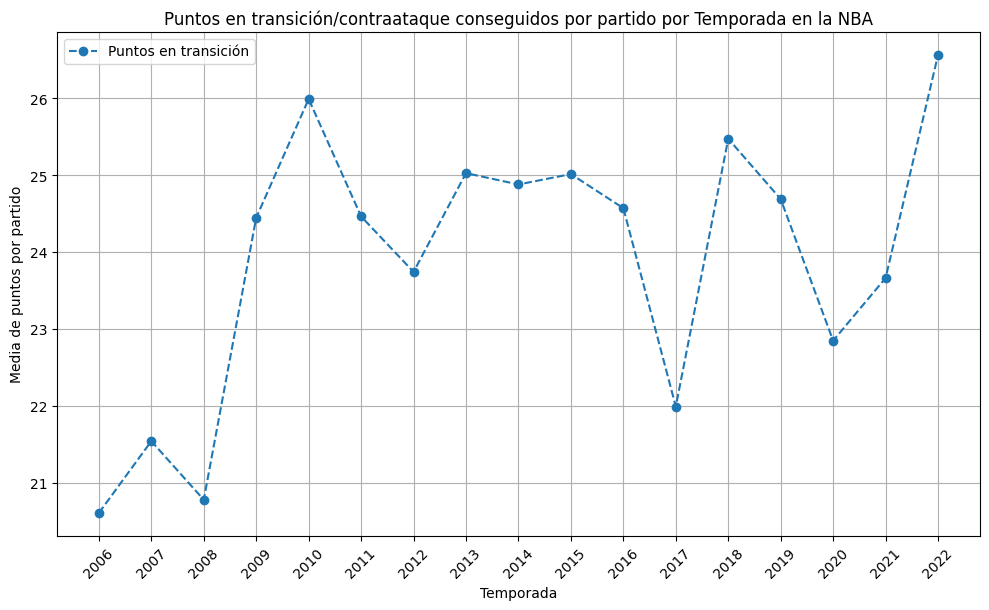

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Puntos en Transición'], marker='o', linestyle='--', label = 'Puntos en transición')

plt.xlabel('Temporada')
plt.ylabel('Media de puntos por partido')
plt.title('Puntos en transición/contraataque conseguidos por partido por Temporada en la NBA')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45) 
plt.legend()
plt.show()

* No existe una diferencia clara a lo largo de los años, así que se puede descartar

Cuarto, ha habido un gran crecimiento en la cantidad de puntos por partido:

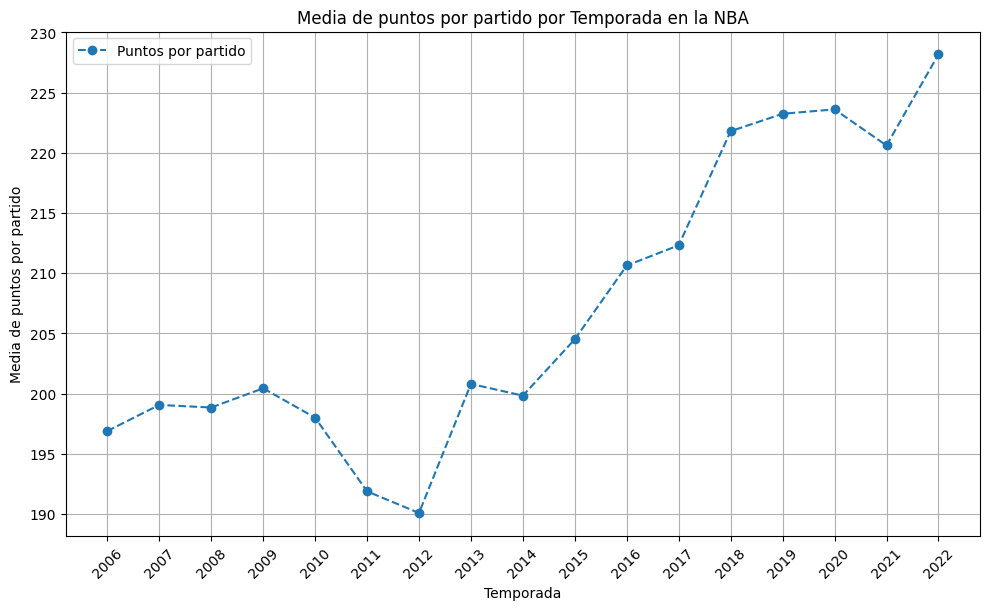

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Puntos'], marker='o', linestyle='--', label = 'Puntos por partido')

plt.xlabel('Temporada')
plt.ylabel('Media de puntos por partido')
plt.title('Media de puntos por partido por Temporada en la NBA')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45) 
plt.legend()
plt.show()

* Es bastante obvia el gran crecimiento que hay empezando en la temporada 2015-2016

### Sería interesante pie o bar charts de todas las temporadas y la composicion de los puntos por partido según tipos:

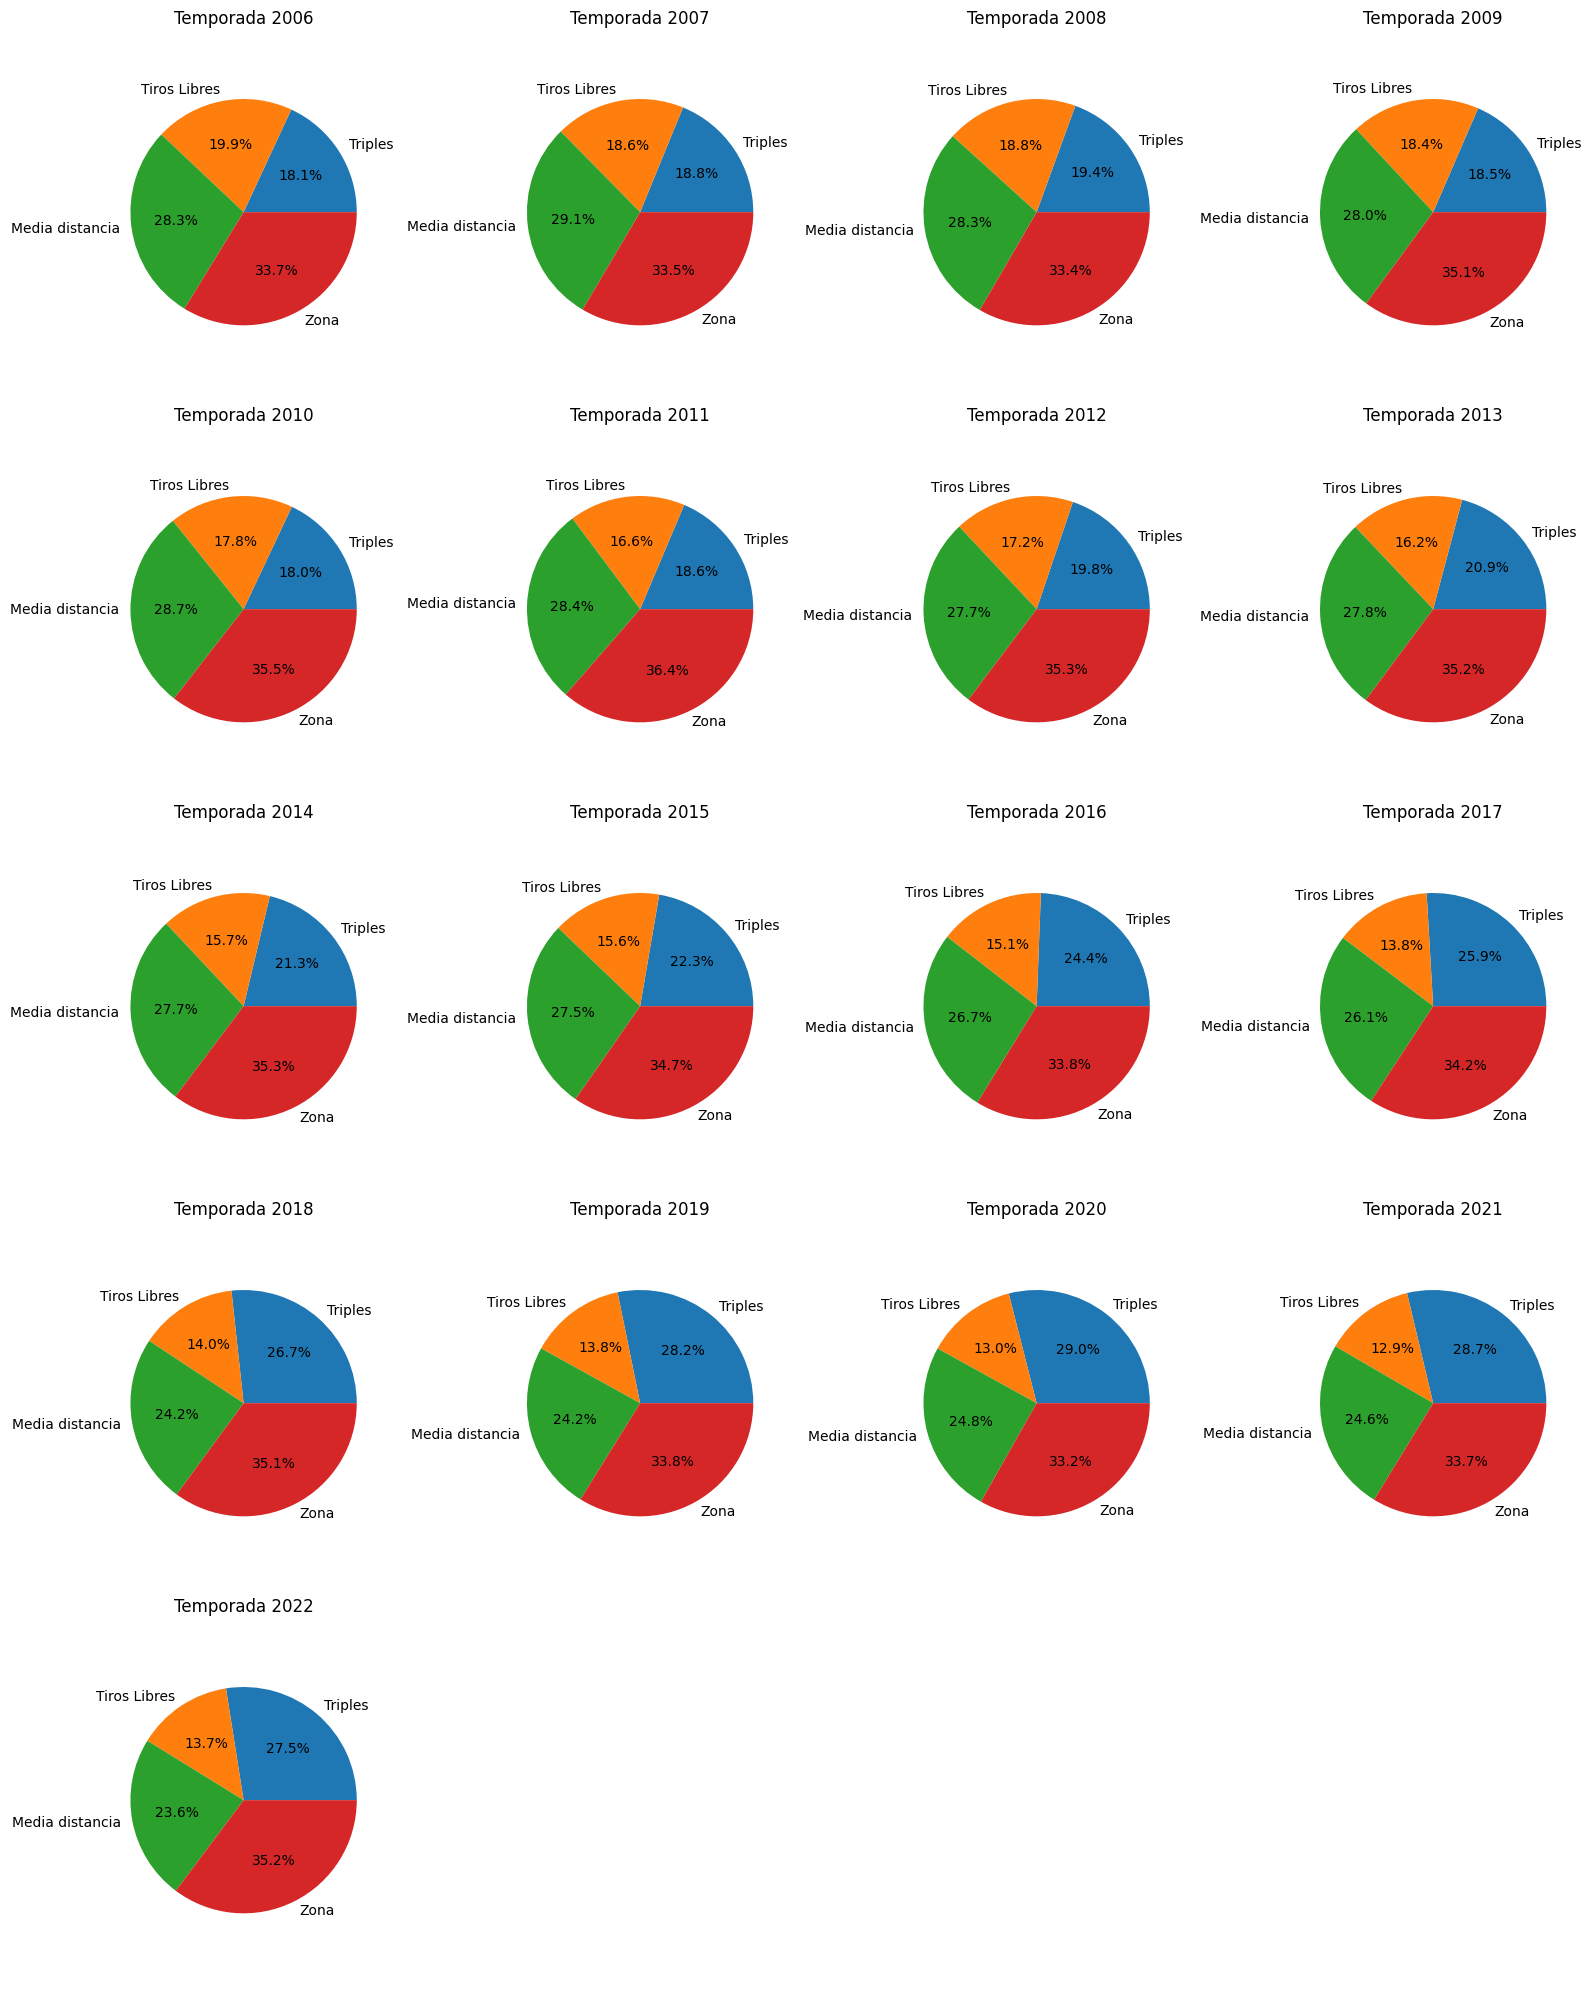

In [19]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))

for i in nba_agrupados.index:

    total_puntos_por_partido = nba_medias['Media Puntos'][i]
    puntos_por_partido_triples = nba_medias['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = nba_medias ['Media Puntos Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = nba_medias['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = nba_medias['Media Puntos en Zona'][i] / total_puntos_por_partido
 
    ax = axs[i // 4, i % 4]
    ax.pie([puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            labels=['Triples', 'Tiros Libres', 'Media distancia', 'Zona'],
            autopct='%1.1f%%')
    ax.set_title(f'Temporada {2006+i}')
    ax.axis('equal')  # Asegura que el gráfico de pie sea un círculo
    
for i in range(17, 20):
    fig.delaxes(axs[i // 4, i % 4]) #eliminar los sobrantes que no se han pintado

plt.tight_layout()
plt.show()

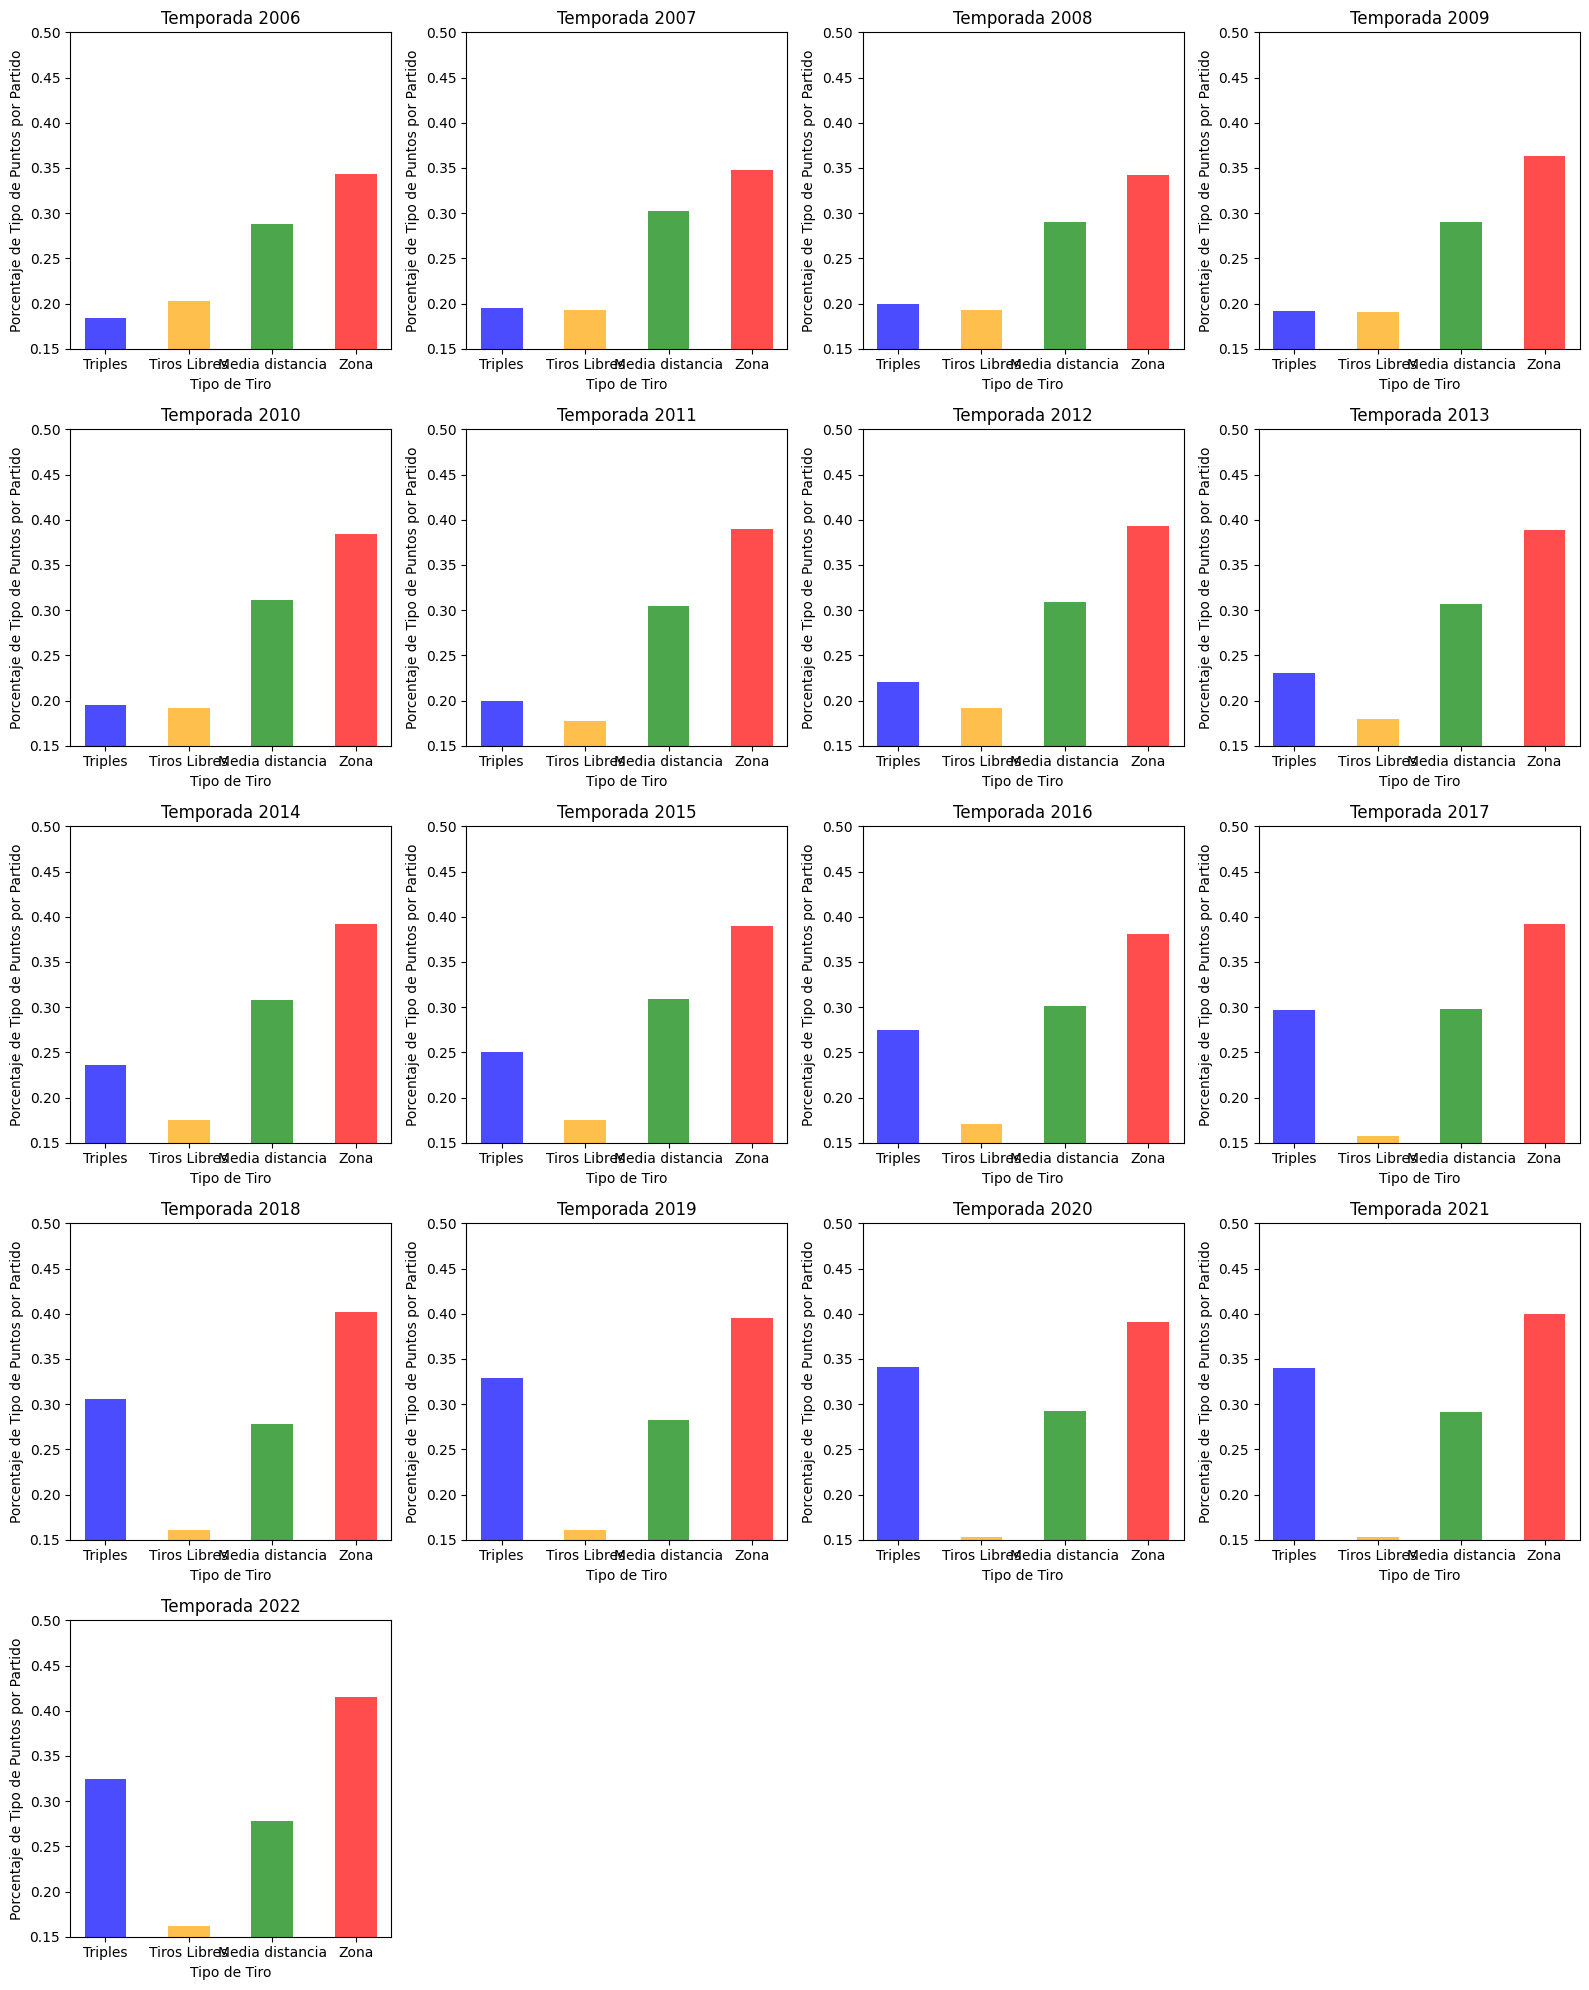

In [20]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))

for i in nba_agrupados.index:

    total_puntos_por_partido = nba_medias['Media Puntos'][i]
    puntos_por_partido_triples = nba_medias['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = nba_medias ['Media Puntos Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = nba_medias['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = nba_medias['Media Puntos en Zona'][i] / total_puntos_por_partido

    ax = axs[i // 4, i % 4]
    ax.bar(['Triples', 'Tiros Libres', 'Media distancia', 'Zona'],
           [puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            color=['blue', 'orange', 'green', 'red'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+i}')
    ax.set_ylim(0.15, 0.5)
    ax.set_xlabel('Tipo de Tiro')
    ax.set_ylabel('Porcentaje de Tipo de Puntos por Partido')
    
for i in range(17, 20):
    fig.delaxes(axs[i // 4, i % 4])

plt.tight_layout()
plt.show()

* Cosas a destacar:

1. Existe un crecimiento de casi un 10% en puntos que vienen de tiros de triples.
2. Una reducción del 6% de puntos de tiro libre
3. Una reducción del 5% de puntos de media distancia
4. Los puntos desde la zona apenas se ven afectados

Esto nos guía a estas conclusiones:

1. Se tiran muchos más triples, y los puntos totales se componen más de tiros de 3.
2. Se encestan los mismos puntos de tiros de media distancia y tiros libres, pero el total de puntos por partido ha aumentado.
3. La proporción de puntos en la zona apenas ha variado, y se ha adaptado al aumento de puntos totales.

------------

## *Conclusión 1:*

* En la NBA actual, los partidos se componen de muchos más **tiros de triple**, probablemente guiada por un aumento en las posesiones (la única manera en que haya más tiros en el mismo tiempo), y esto lleva a un aumento en las puntuaciones totales por partido

## Es el momento de especializarlo por equipos y a lo largo de pocos años antes y después del primer anillo de GSW
* He escogido, bajo mi criterio, una muestra de equipos de la NBA según conferencias que puede representar toda la NBA, distintos estilos, y con buenas posiciones en la tabla de clasificación:
#### Los equipos de la Conferencia Oeste escogidos (sin contar GSW) son: 
1. OKC (destacando por un super equipo en 2012, y buenas puntuaciones, llegando a eliminar a los Warriors en 2010 y enfrentandose en dos finales de conferencia seguidas en las temporadas 2015-16 y 2016-17)
2. Clippers (otro super equipo en los años 2012-2013, aunque nunca llegando a tener éxito en playoffs)
3. Memphis (también se caracteriza por una buena presencia en los playoffs durante esos años)
4. Spurs (llegaron a conseguir un anillo en 2013-2014, siendo una gran muestra a la adaptación a la nueva NBA, siendo un estilo más de la vieja escuela)
#### Los equipos de la Conferencia Este escogidos son: 
1. Cleveland (el mayor rival de GSW y el único que consiguió robarle un anillo en 2015-2016, justamente en la mejor temporada de la historia de un equipo, consiguiendo los Warriors un 73-9 en W-L)
2. Toronto (otro equipo ahora en el Este que tuvo un equipo muy bueno reconocido pero nunca tuvo éxito en Playoffs)
3. Boston (un equipo en reconstrucción, con cambio de entrenador en 2012 que le llevó a destacar en la conferencia Este, y ser de los mejores actualmente)
4. Miami (ganadores de varios anillos en el periodo anterior a GSW liderados por LeBron, Bosh y Wade, el gran Big 3 de la NBA)

* Creo una lista de dataframes con solo los datos según equipos:

In [55]:
teams = []
lista_equipos = ['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA']
for equipo in lista_equipos:
    muestra = nba[(nba.Local == equipo) | (nba.Visitante == equipo)]
    teams.append(muestra)

#### Me quedo con los datos que me interesan por equipo:
1. Puntos
2. Puntos en zona
3. Tiros libres
4. Puntos de triple
5. Triples intentados
6. Puntos de media distancia

In [56]:
for i, equipo in enumerate(lista_equipos):
    for j,valor in teams[i].Local.items():
        if lista_equipos[i] == valor:
            teams[i][f'Puntos'] = teams[i]['Puntos Local']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Local']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Local']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Local']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Local']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Local']
        else:
            teams[i][f'Puntos'] = teams[i]['Puntos Visitante']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Visitante']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Visitante']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Visitante']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Visitante']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Visitante']
            
    columnas_a_conservar = ['Partido','Local','Visitante','Temporada',f'Puntos',f'Tiros Libres',f'Puntos en Zona', f'Puntos de 3',f'Triples intentados',f'Puntos de media distancia']
    teams[i] = teams[i][columnas_a_conservar]

/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_96475/3000113973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams[i][f'Puntos'] = teams[i]['Puntos Local']
/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_96475/3000113973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Local']
/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_96475/3000113973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

* Una muestra de un dataframe:

In [57]:
teams[0].head()

,Partido,Local,Visitante,Temporada,Puntos,Tiros Libres,Puntos en Zona,Puntos de 3,Triples intentados,Puntos de media distancia
6,GSW vs. LAL,GSW,LAL,2006,98.0,27.0,44.0,9.0,19.0,24.0
21,GSW vs. POR,GSW,POR,2006,102.0,21.0,58.0,15.0,11.0,18.0
34,UTA vs. GSW,GSW,UTA,2006,106.0,15.0,36.0,15.0,11.0,50.0
41,DAL vs. GSW,DAL,GSW,2006,104.0,17.0,44.0,33.0,30.0,32.0
48,NOK vs. GSW,GSW,NOK,2006,97.0,15.0,44.0,18.0,15.0,32.0


#### Ahora agrupo todos los dataframes por temporada:

In [58]:
teams_agrupados = []
for i in range(len(lista_equipos)):
    muestra = []
    muestra = teams[i].groupby('Temporada').sum()
    teams_agrupados.append(muestra)
    teams_agrupados[i]['Partidos por Temporada'] = teams[i]['Temporada'].value_counts()
    columnas_a_eliminar = ['Partido','Local','Visitante']
    teams_agrupados[i] = teams_agrupados[i].drop(columns=columnas_a_eliminar)

### Y hago otro dataframe (el que será analizado) con las medias:

In [146]:
teams_medias = []
for i, equipo in enumerate(lista_equipos):
    muestra = pd.DataFrame()
    teams_medias.append(muestra)
    teams_medias[i][f'Media Puntos'] = (teams_agrupados[i][f'Puntos'])/(teams_agrupados[i]['Partidos por Temporada'])
    teams_medias[i][f'Media Puntos Triples'] = teams_agrupados[i][f'Puntos de 3']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples intentados'] = teams_agrupados[i][f'Triples intentados']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples encestados'] = (teams_agrupados[i][f'Puntos de 3']/3)/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos de media distancia'] = teams_agrupados[i][f'Puntos de media distancia']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Tiros Libres'] = teams_agrupados[i][f'Tiros Libres']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos en Zona'] = teams_agrupados[i][f'Puntos en Zona']/teams_agrupados[i]['Partidos por Temporada']

In [147]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].reset_index()

* Convertimos las temporadas en números enteros

In [148]:
for i in range(len(lista_equipos)):
    teams_medias[i].Temporada = teams_medias[i].Temporada.astype(int)

In [149]:
teams_medias[0].head()

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2006,111.356164,26.136986,22.547945,8.712329,35.013699,21.931507,45.698630
1,2007,111.324675,24.740260,23.415584,8.246753,36.363636,20.298701,46.415584
2,2008,112.746032,20.666667,17.619048,6.888889,36.476190,22.936508,46.444444
3,2009,112.608108,21.243243,18.959459,7.081081,38.405405,21.878378,45.243243
4,2010,107.698795,24.253012,20.891566,8.084337,36.000000,19.879518,43.734940


* Ahora ya con las medias conseguidas para cualquier equipo, se puede empezar a hacer gráficas:

### El orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'POR' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)

### La hipótesis entonces por equipos es:
#### Se produjo una subida en los GSW en:
#### 1. Los puntos viniendo de triple.
#### 2. El aumento de puntos por partido, a partir de la temporada 12-13 (cuando ya Curry estaba acompañado por su equipo), empezando a carburar durante 2 años, consiguiendo su primer anillo (de 3 totales) en el 14-15, y causando que la NBA se adaptara a ellos buscando lo mismo.

#### Comparación de puntos de triples en la Conferencia **OESTE**:

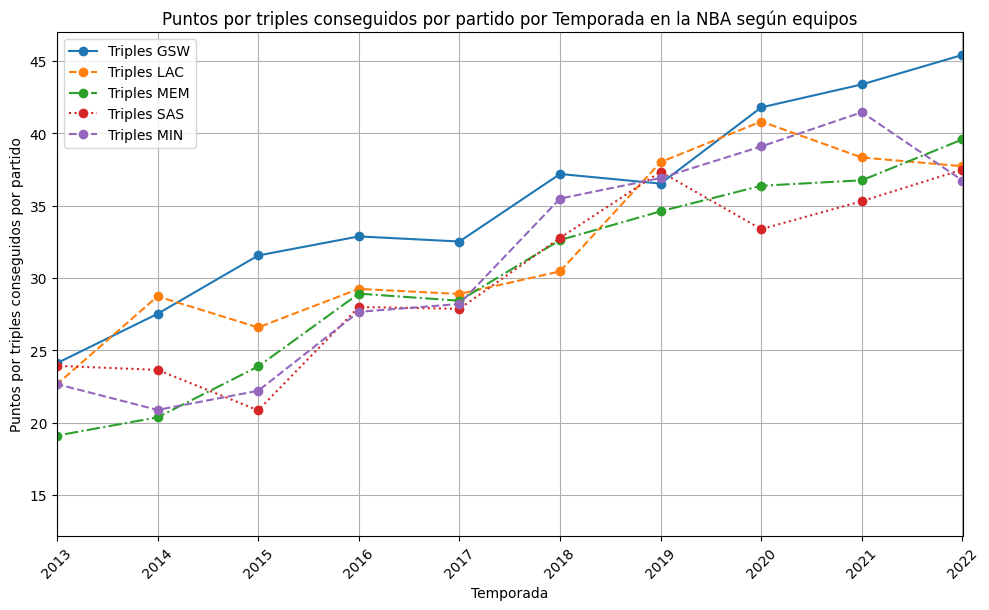

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples LAC')
plt.plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples MEM')
plt.plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples SAS')
plt.plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIN')

plt.xlabel('Temporada')
plt.xlim([2013,2022])
plt.ylabel('Puntos por triples conseguidos por partido')
plt.title('Puntos por triples conseguidos por partido por Temporada en la NBA según equipos')
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

* Clippers experimenta la misma subida que GSW en 2014 pero luego se estanca, volviendo a subir en 2016.
* Es clara la subida en Minnesota en 2016, 2 temporadas después del primer anillo de GSW.
* MEM se adaptó mejor, con una subida parecida a GSW y muy brusca en 2016 (después de la temporada 73-9 de GSW), aunque venía de una cantidad menor
* SAS también empezó subiendo en 2016

#### Comparación de puntos de triples en la Conferencia **ESTE**:

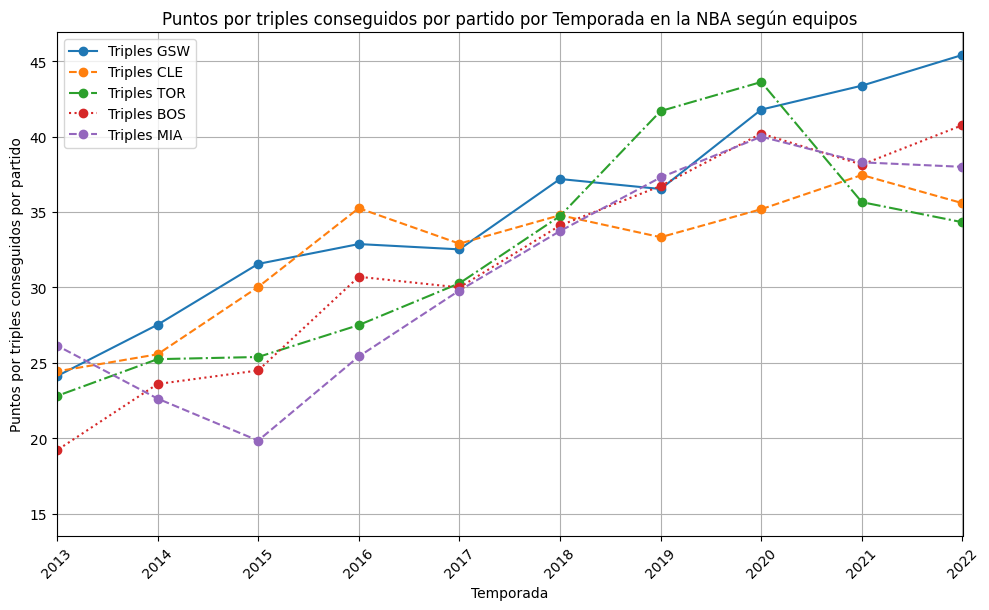

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
plt.plot(teams_medias[5].Temporada, teams_medias[5]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples CLE')
plt.plot(teams_medias[6].Temporada, teams_medias[6]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples TOR')
plt.plot(teams_medias[7].Temporada, teams_medias[7]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples BOS')
plt.plot(teams_medias[8].Temporada, teams_medias[8]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIA')

# Configuraciones adicionales
plt.xlabel('Temporada')
plt.xlim([2013,2022])
plt.ylabel('Puntos por triples conseguidos por partido')
plt.title('Puntos por triples conseguidos por partido por Temporada en la NBA según equipos')
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

* No se puede sacar nada en claro de CLE con respecto a triples, experimenta una subida similar que GSW (son sus mayores rivales, tal vez por eso pudieron ganarles)
* En TOR la subida llega tiempo después, de forma muy progresiva
* En BOS se produce una subida similar a GSW pero desde más abajo, pero la subida más brusca ocurre en 2016 igual
* En MIA la subida se produce en 2016 también

#### Comparación de puntos totales en la conferencia **OESTE**:

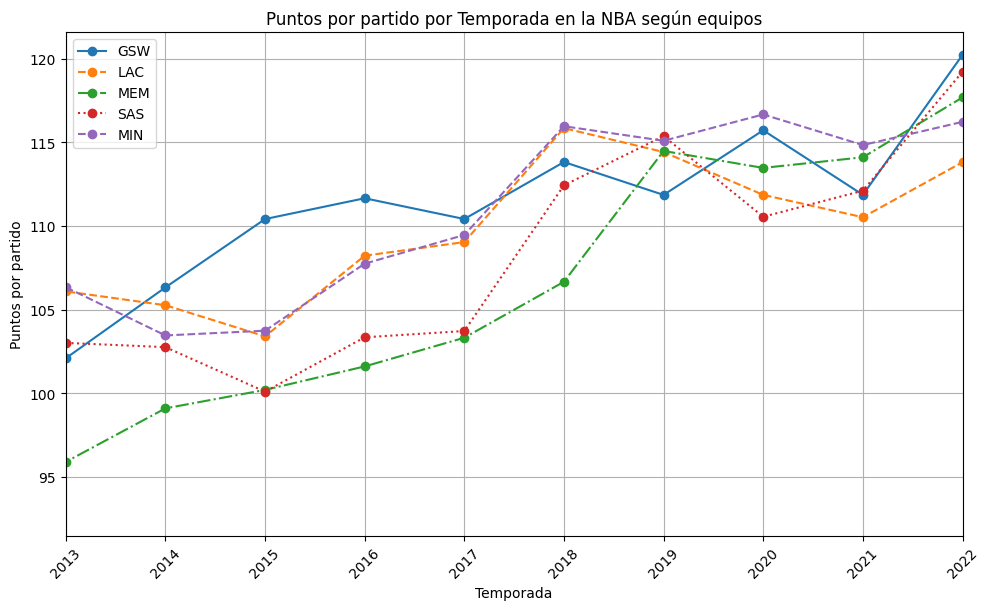

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos'], marker='o', linestyle='--', label = 'LAC')
plt.plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos'], marker='o', linestyle='-.', label = 'MEM')
plt.plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos'], marker='o', linestyle=':', label = 'SAS')
plt.plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIN')

# Configuraciones adicionales
plt.xlim([2013,2022])
plt.xlabel('Temporada')
plt.ylabel('Puntos por partido')
plt.title('Puntos por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

* Se ve claramente una subida mucho más brusca de parte de GSW de los años 2014 a 2016 que todos los demás

#### Comparación de puntos totales en la conferencia **ESTE**:

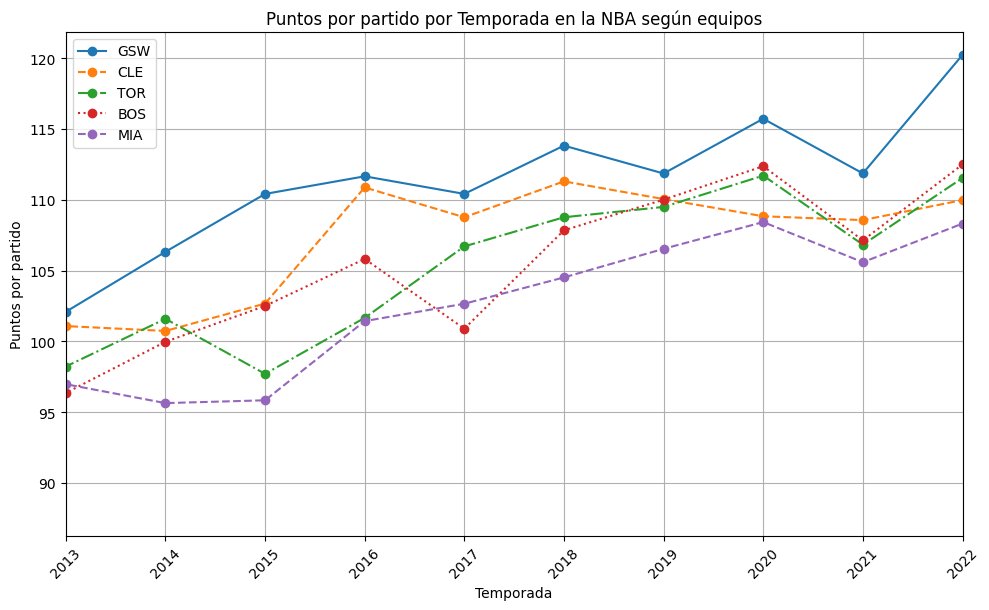

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[5]['Media Puntos'], marker='o', linestyle='--', label = 'CLE')
plt.plot(teams_medias[2].Temporada, teams_medias[6]['Media Puntos'], marker='o', linestyle='-.', label = 'TOR')
plt.plot(teams_medias[3].Temporada, teams_medias[7]['Media Puntos'], marker='o', linestyle=':', label = 'BOS')
plt.plot(teams_medias[4].Temporada, teams_medias[8]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIA')

# Configuraciones adicionales
plt.xlabel('Temporada')
plt.ylabel('Puntos por partido')
plt.xlim([2013,2022])
plt.title('Puntos por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

En la conferencia Este, esta adaptación será más lenta que el Oeste (al no coincidir con GSW directamente).
- Para MIA se ve claramente la subida a partir de 2016. 
- Para CLE se ve exactamente lo mismo (aunque no pasara lo mismo con respecto a los triples).
- Para TOR, aun habiendo una subida similar en 2014, existe la misma bajada en 2015 para volver en 2016
- BOS parece la excepción, justo coincidiendo con la llegada de Brad Stevens como entrenador en 2013 para darle una vuelta al equipo.

### Ahora me centraré en las temporadas 2013-14 a 2016-17 con respecto a puntos de triples y puntos totales:

In [154]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].set_index('Temporada')

In [155]:
teams_medias_temporadas = []
for i in range(len(teams_medias)):
    muestra = teams_medias[i].drop([2006,2007,2008,2009,2010,2011,2012,2017,2018,2019,2020,2021,2022])
    teams_medias_temporadas.append(muestra)

In [159]:
for i in range(len(lista_equipos)):
    teams_medias_temporadas[i] = teams_medias_temporadas[i].reset_index()

In [157]:
teams_medias_temporadas[0]

,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
Temporada,,,,,,,
2013,102.089744,24.115385,22.230769,8.038462,35.461538,17.666667,40.923077
2014,106.329897,27.525773,24.082474,9.175258,35.381443,18.432990,43.340206
2015,110.418367,31.561224,27.469388,10.520408,38.204082,18.775510,42.918367
2016,111.663265,32.877551,29.632653,10.959184,36.040816,18.255102,46.408163


* Creo un diccionario únicamente con motivo de pintar en el futuro:

In [111]:
dicc_iterar = {
    '0': 7,
    '1': 8,
    '2': 9,
    '3': 10
}

* Recordamos que el orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'MIN' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)

### Gráfico de barras de las **temporadas 2013-14 a 2016-17** de los puntos por triples de todos los equipos escogidos.

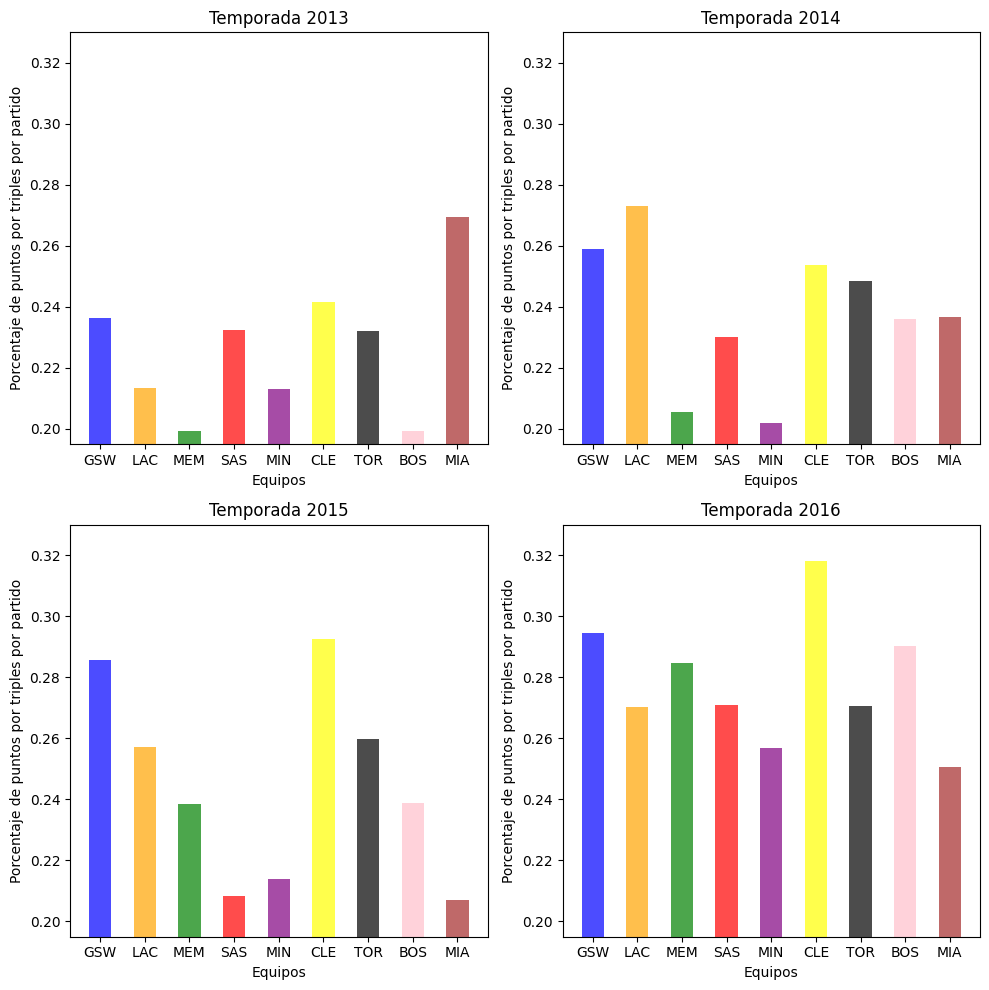

In [160]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    puntos_por_partido_triples_gsw = teams_medias_temporadas[0]['Media Puntos Triples'][i] / total_puntos_por_partido_gsw
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    puntos_por_partido_triples_lac = teams_medias_temporadas[1]['Media Puntos Triples'][i] / total_puntos_por_partido_lac
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    puntos_por_partido_triples_mem = teams_medias_temporadas[2]['Media Puntos Triples'][i] / total_puntos_por_partido_mem
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    puntos_por_partido_triples_sas = teams_medias_temporadas[3]['Media Puntos Triples'][i] / total_puntos_por_partido_sas
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    puntos_por_partido_triples_min = teams_medias_temporadas[4]['Media Puntos Triples'][i] / total_puntos_por_partido_min
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    puntos_por_partido_triples_cle = teams_medias_temporadas[5]['Media Puntos Triples'][i] / total_puntos_por_partido_cle
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    puntos_por_partido_triples_tor = teams_medias_temporadas[6]['Media Puntos Triples'][i] / total_puntos_por_partido_tor
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    puntos_por_partido_triples_bos = teams_medias_temporadas[7]['Media Puntos Triples'][i] / total_puntos_por_partido_bos
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]
    puntos_por_partido_triples_mia = teams_medias_temporadas[8]['Media Puntos Triples'][i] / total_puntos_por_partido_mia

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [puntos_por_partido_triples_gsw, puntos_por_partido_triples_lac, puntos_por_partido_triples_mem, puntos_por_partido_triples_sas, puntos_por_partido_triples_min, puntos_por_partido_triples_cle, puntos_por_partido_triples_tor, puntos_por_partido_triples_bos, puntos_por_partido_triples_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(0.195, 0.33)
    ax.set_ylabel('Porcentaje de puntos por triples por partido')
    ax.set_xlabel('Equipos')


# Mostrar los gráficos
plt.tight_layout()
plt.show()

#### Se aprecia claramente una subida de los puntos de triples de parte de GSW en la temporada 2014 (su primer anillo), seguida en 2015 y 2016 por todos los demás equipos. 

#### Cleveland parece ser la excepción (el único equipo que les ganó, puede que sea motivo de ello)

#### Clippers también pero sin éxito

### Gráfico de barras de las **temporadas 2013-14 a 2016-17** de los puntos totales de todos los equipos escogidos.

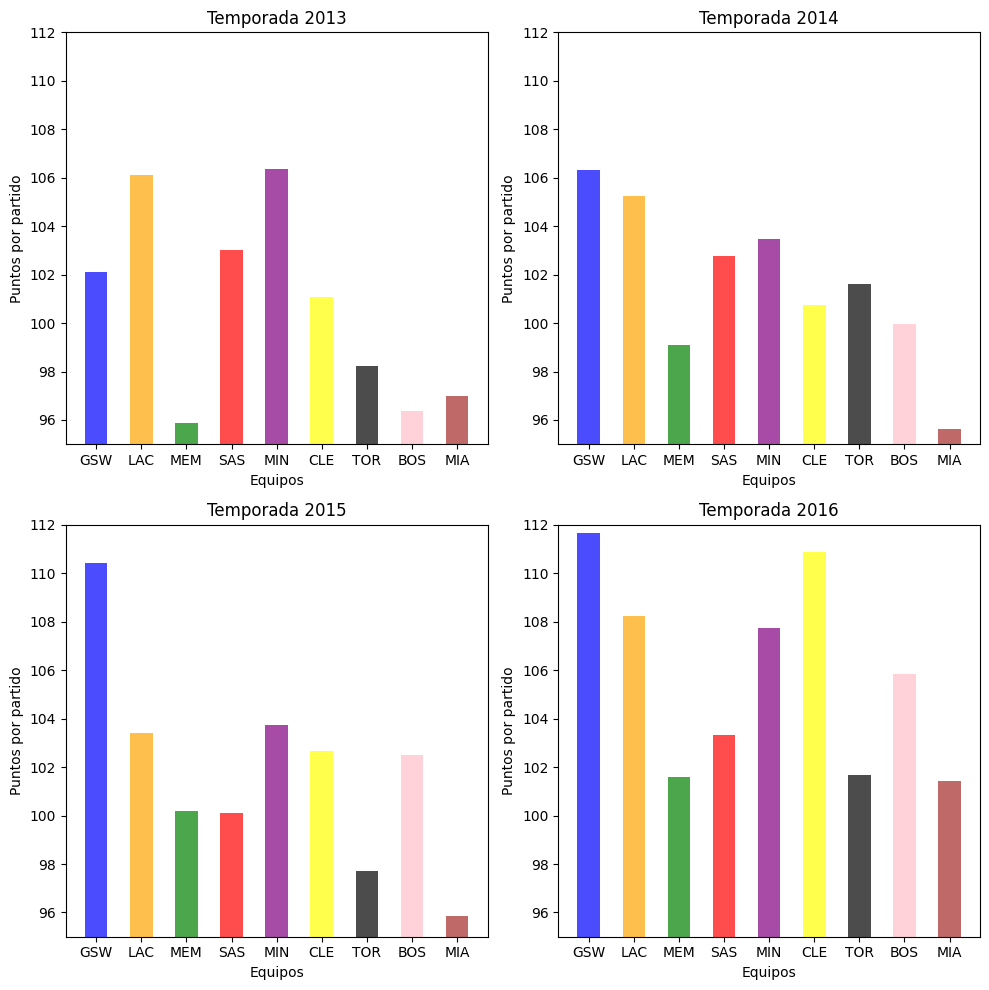

In [161]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [total_puntos_por_partido_gsw, total_puntos_por_partido_lac, total_puntos_por_partido_mem, total_puntos_por_partido_sas, total_puntos_por_partido_min, total_puntos_por_partido_cle, total_puntos_por_partido_tor, total_puntos_por_partido_bos, total_puntos_por_partido_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(95, 112)
    ax.set_ylabel('Puntos por partido')
    ax.set_xlabel('Equipos')

plt.tight_layout()
plt.show()

#### Aquí se aprecia ya la diferencia total para todos los equipos:

#### Los GSW experimentaron una subida en el 2014-2015 y 2015-2016, no seguida por ningún equipo

#### Una vez los Cavaliers consiguieron equipararse en 2016-2017 también en puntos por partido (recordamos que eran la excepción en triples), después de que consiguieran ganarles en las Finales en una remontada histórica

#### Todos los demás equipos se adaptaron con el tiempo igual